In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

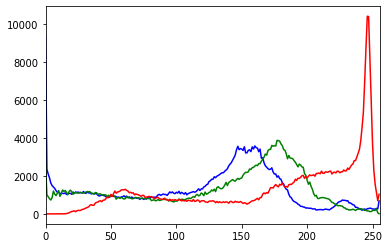

In [12]:
#computing the histogram of the given image
img = cv.imread('Katrina_Kaif.jpg',cv.IMREAD_COLOR ) 
color=('b','g','r')
for i, c in enumerate(color):
    hist = cv.calcHist([img], [i], None, [256], [0,256])
    plt.plot(hist,color=c )
plt.xlim([0,256])
plt.show()

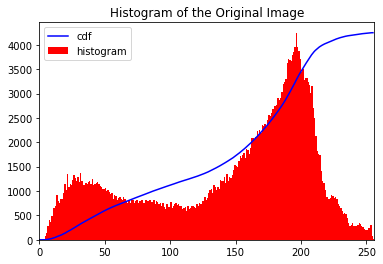

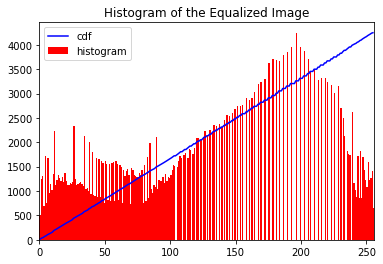

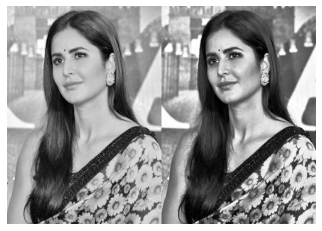

In [4]:
img = cv.imread('Katrina_Kaif.jpg', cv.IMREAD_GRAYSCALE )
hist,bins=np.histogram(img.ravel(), 256, [0,256])
cdf=hist.cumsum()
cdf_normalized=cdf*hist.max()/cdf.max()
plt.plot(cdf_normalized , color='b')
plt.hist(img.flatten(), 256,[0,256],color='r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'),loc='upper left')
plt.title('Histogram of the Original Image')
plt.show()
equ = cv.equalizeHist(img)
hist,bins = np.histogram(equ.ravel() ,256 , [0,256])
cdf = hist.cumsum()
cdf_normalized = cdf*hist.max()/ cdf.max()
plt.plot(cdf_normalized , color = 'b')
plt.hist(equ.flatten() , 256 , [0,256] , color='r')
plt.xlim ([0,256] )
plt.legend(('cdf','histogram') , loc='upper left' )
plt.title('Histogram of the Equalized Image' )
plt.show()
res=np.hstack((img , equ))
plt.axis ('off' )
plt.imshow(res,cmap='gray')

101
50
105
256


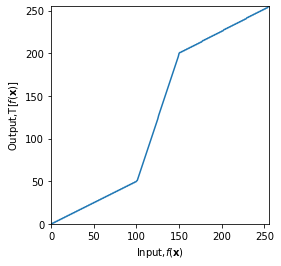

In [13]:
c = np.array([(100,50),(150,200)]) 
t1=np.linspace(0,c[0,1],c[0,0]+1-0).astype('uint8')
print(len(t1))
t2 = np.linspace(c[0,1]+1,c[1,1],c[1,0]-c[0,0]).astype('uint8')
print(len(t2))
t3=np.linspace(c[1,1]+1,255,255-c[1,0]).astype('uint8')
print(len(t3))
transform = np.concatenate((t1, t2), axis=0).astype('uint8')
transform = np.concatenate((transform, t3), axis=0).astype('uint8')
print(len(transform))
fig,ax = plt.subplots()
ax.plot(transform)
ax.set_xlabel(r'Input,$f(\mathbf{x})$')
ax.set_ylabel('Output,$\mathrm{T}[f(\mathbf{x})]$')
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal')
plt.savefig('transform.png' )
plt.show()
img_orig =cv.imread('Katrina_Kaif.jpg' , cv.IMREAD_GRAYSCALE )
cv.namedWindow ( " Image " , cv.WINDOW_AUTOSIZE)
cv.imshow ( " Image " , img_orig)
cv.waitKey(0)
image_transformed = cv.LUT(img_orig , transform )
cv.imshow ( "Image" , image_transformed )
cv.waitKey(0)
cv.destroyAllWindows()

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

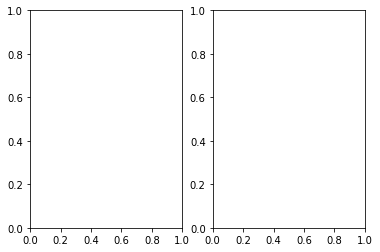

In [6]:
img_orig = cv.imread( 'Katrina_Kaif.jpg' , cv.IMREAD_COLOR )
gamma = 2
table = np.array([(i/255.0)**(gamma)*255.0 for i in np.arange(0,256)]).astype('uint8')
img_gamma = cv.LUT(img_orig, table)
img_orig=cv.cvtColor(img_orig , cv.COLOR_BGR2RGB )
img_gamma = cv.cvtColor(img_gamma , cv.COLOR_BGR2RGB )
f,axarr=plt.subplots(1,2)
axarr[0,0].imshow(img_orig)
axarr[0,1].imshow(img_gamma)
#color=('b' ,  'g' , 'r' )
#for i,c in enumerate ( color) :
#    hist_orig = cv.calcHist([img_orig],[i] , None , [256] , [0,256] )
#axarr[1,0].plot(hist_orig , color = c )
#hist_gamma = cv.calcHist([img_gamma] , [i] , None , [ 256 ] , [ 0,256] )
#axarr[1,1].plot(hist_gamma, color = c )
#axarr[2,0].plot(table)
#axarr[2,0].set_xlim(0,255)
#axarr[2,0].set_ylim(0,255)
#axarr[2,0].set_aspect('equal')


In [14]:
gamma=4
f=cv.imread( 'Katrina_Kaif.jpg' , cv.IMREAD_GRAYSCALE)/255.

cv.namedWindow('Image',cv.WINDOW_AUTOSIZE)
cv.imshow('Image',f)
cv.waitKey(0)
g=f**gamma
cv.imshow('Image',g)
cv.waitKey(0)
cv.destroyAllWindows()


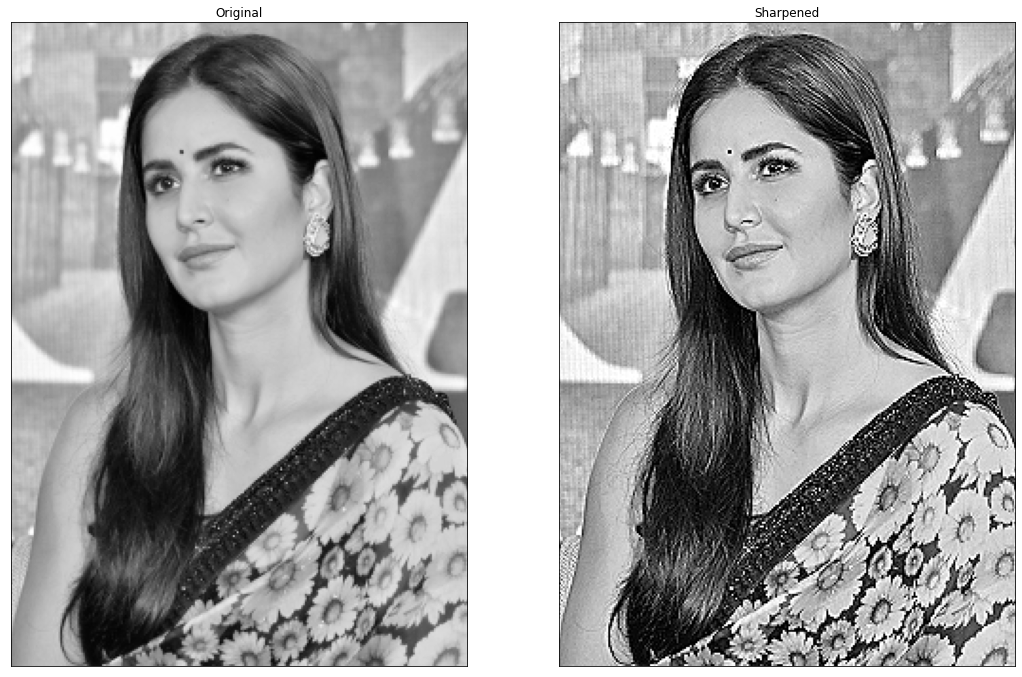

In [8]:
img = cv.imread('Katrina_Kaif.jpg', cv.IMREAD_REDUCED_GRAYSCALE_2)

kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]], dtype='float') # kernel is calculated by hand
imgc = cv.filter2D(img,-1,kernel)

fig, axes  = plt.subplots(1,2, sharex='all', sharey='all', figsize=(18,18))
axes[0].imshow(img, cmap='gray')
axes[0].set_title('Original')
axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(imgc, cmap='gray')
axes[1].set_title('Sharpened')
axes[1].set_xticks([]), axes[1].set_yticks([])
plt.show()

In [2]:
def noisy(noise_typ,image):    
    """
    Parameters
    ----------
    image : ndarray
        Input image data. Will be converted to float.
    mode : str
        One of the following strings, selecting the type of noise to add:

        'gauss'     Gaussian-distributed additive noise.
        'poisson'   Poisson-distributed noise generated from the data.
        's&p'       Replaces random pixels with 0 or 1.
        'speckle'   Multiplicative noise using out = image + n*image,where
                    n is uniform noise with specified mean & variance.
        
        Source: https://stackoverflow.com/a/30609854
    """    
    if noise_typ == "gauss":
        row,col,ch= image.shape
        mean = 0
        var = 100.
        sigma = var**0.5
        gauss = np.random.normal(mean,sigma,(row,col,ch))
        gauss = gauss.reshape(row,col,ch)
        noisy = image + gauss
        noisy = np.clip(noisy, 0.0, 255.0)
        print(stats.describe(noisy.ravel()))
        return noisy
    elif noise_typ == "s&p":
        # row,col,ch = image.shape
        s_vs_p = 0.5
        amount = 0.2
        out = np.copy(image)
        # Salt mode
        num_salt = np.ceil(amount * image.size * s_vs_p)
        coords = [np.random.randint(0, i - 1, int(num_salt))
              for i in image.shape]
        out[coords] = 255

        # Pepper mode
        num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
        coords = [np.random.randint(0, i - 1, int(num_pepper))
              for i in image.shape]
        out[coords] = 0
        return out
    elif noise_typ == "poisson":
        vals = len(np.unique(image))
        vals = 2 ** np.ceil(np.log2(vals))
        noisy = np.random.poisson(image * vals) / float(vals)
        return noisy
    elif noise_typ =="speckle":
        row,col,ch = image.shape
        gauss = np.random.randn(row,col,ch)
        gauss = gauss.reshape(row,col,ch)        
        noisy = image + image * gauss
        noisy = np.clip(noisy, 0.0, 255.0)
        return noisy

<ipython-input-2-09aabf3d6501>:38: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[coords] = 255
<ipython-input-2-09aabf3d6501>:44: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[coords] = 0


[1. 2. 3.]


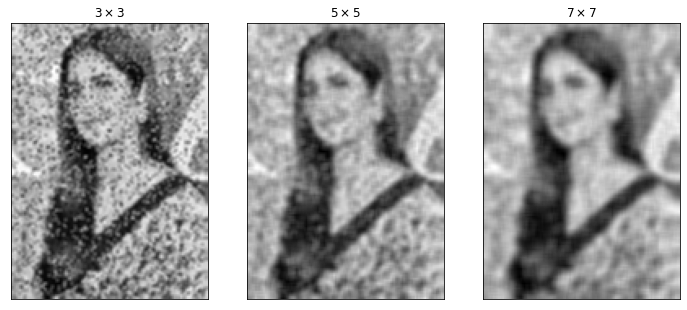

In [3]:
img = cv.imread('Katrina_Kaif.jpg', cv.IMREAD_REDUCED_GRAYSCALE_4)
imn =  noisy('s&p', img.astype('float32'))

ksize = np.array([3, 5, 7])
sigma = (ksize-1)/2.
print(sigma)

fig, axes  = plt.subplots(1, 3, sharex='all', sharey='all', figsize=(12,12))

for i in range(3):
    imf = cv.GaussianBlur(imn, (ksize[i], ksize[i]), sigmaX=sigma[i], sigmaY=sigma[i])        
    axes[i].imshow(imf, cmap='gray')
    axes[i].set_title(r'${0}\times {0}$'.format(ksize[i]))
    axes[i].set_xticks([]), axes[i].set_yticks([])

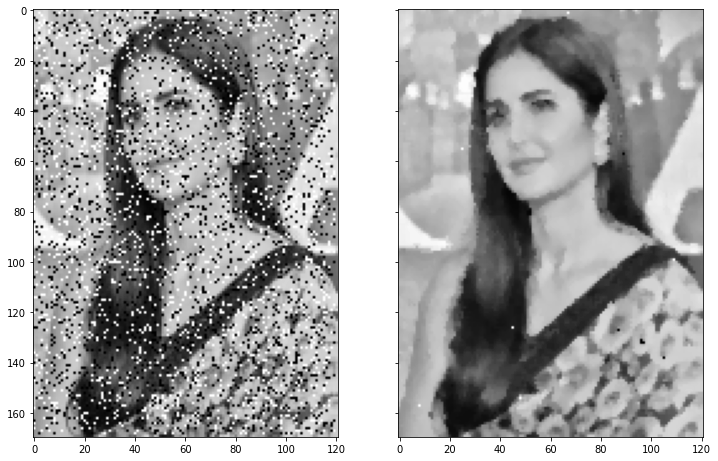

In [14]:
fig, axes  = plt.subplots(1, 2, sharex='all', sharey='all', figsize=(12,12))
imf = cv.medianBlur(imn, 3)
axes[0].imshow(imn, cmap='gray')
axes[1].imshow(imf, cmap='gray')
plt.show()

(-0.5, 481.5, 679.5, -0.5)

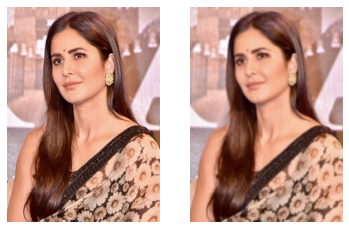

In [19]:
img = cv.imread('Katrina_Kaif.jpg')
sigma = 2     #sigma is 2
k_width = 2*(3*sigma)+1 # size is 13
G_img = cv.GaussianBlur(img,(k_width,k_width),sigma)
fig,(ax1,ax2) = plt.subplots(1,2 , figsize=(6,6))
ax1.imshow(cv.cvtColor(img,  cv . COLOR_BGR2RGB))
ax1.axis("off")
ax2.imshow(cv.cvtColor(G_img,  cv . COLOR_BGR2RGB))
ax2.axis("off")

(-0.5, 481.5, 679.5, -0.5)

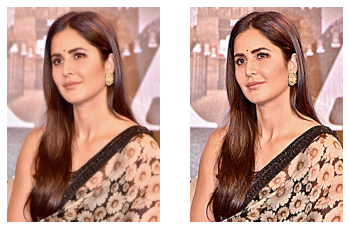

In [22]:
img = cv.imread('Katrina_Kaif.jpg')
sigma =3
k_width = 2*(3*sigma)+1
blured_img = cv.GaussianBlur(img,(k_width,k_width),0)
unsharp_masked_img= cv.addWeighted(img,2.5,blured_img,-1.5,0) 
fig,(ax1,ax2) = plt.subplots(1,2,  figsize=(6,6))
ax1.imshow(cv.cvtColor(img,  cv . COLOR_BGR2RGB))
ax1.axis("off")
ax2.imshow(cv.cvtColor(unsharp_masked_img,  cv . COLOR_BGR2RGB))
ax2.axis("off")

(-0.5, 481.5, 679.5, -0.5)

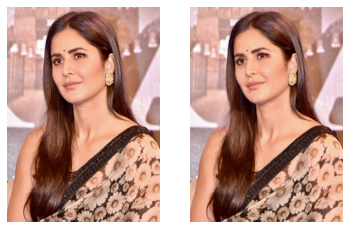

In [24]:
img = cv.imread('Katrina_Kaif.jpg')
kernal_size=3
median_blurred_img = cv.medianBlur(img,kernal_size)
fig,(ax1,ax2) = plt.subplots(1,2,  figsize=(6,6))
ax1.imshow(cv.cvtColor(img,  cv . COLOR_BGR2RGB))
ax1.axis("off")
ax2.imshow(cv.cvtColor(median_blurred_img,  cv . COLOR_BGR2RGB))
ax2.axis("off")

(-0.5, 481.5, 679.5, -0.5)

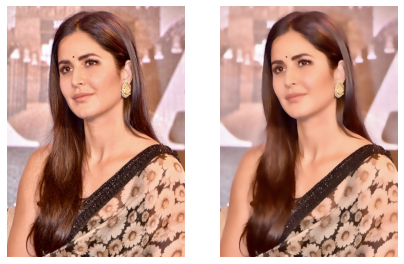

In [26]:
img = cv.imread('Katrina_Kaif.jpg')
biletral_img = cv.bilateralFilter(img,14,75,75)
fig,(ax1,ax2) = plt.subplots(1,2,  figsize=(7,7))
ax1.imshow(cv.cvtColor(img,  cv . COLOR_BGR2RGB))
ax1.axis("off")
ax2.imshow(cv.cvtColor(biletral_img,  cv . COLOR_BGR2RGB))
ax2.axis("off")

Number of rice grains 195


(-0.5, 255.5, 255.5, -0.5)

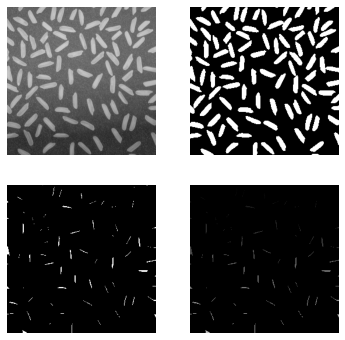

In [52]:
img = cv.imread('../../assignments/a01images/rice.png', cv.IMREAD_GRAYSCALE)
# using adaptive thresholding 
adapthresh_img = cv.adaptiveThreshold (img, 255.0,cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 51, -20.0)
# removeing the white dots using erode interatively 
kernel = np.ones((7,7),np.uint8)
erosion_img = cv.erode(adapthresh_img, kernel)
# counting the pixel with value =255 and then filling the connected pixels to stop recounting 
processing_img = erosion_img.copy()
rice_count = 0
rows, cols = processing_img.shape
for j in range(rows):
    for i in range(cols):
        pixel = processing_img[j, i]
        if 255 == pixel:
            rice_count += 1
            cv.floodFill(processing_img, None, (i, j), rice_count)
print("Number of rice grains", rice_count)
fig,ax = plt.subplots(2,2,  figsize=(6,6))
ax[0,0].imshow(cv.cvtColor(img,  cv . COLOR_BGR2RGB))
ax[0,0].axis("off")
ax[0,1].imshow(cv.cvtColor(adapthresh_img,  cv . COLOR_BGR2RGB))
ax[0,1].axis("off")
ax[1,0].imshow(cv.cvtColor(erosion_img,  cv . COLOR_BGR2RGB))
ax[1,0].axis("off")
ax[1,1].imshow(cv.cvtColor(processing_img,  cv . COLOR_BGR2RGB))
ax[1,1].axis("off")

(270, 480, 3) (1080, 1920, 3)


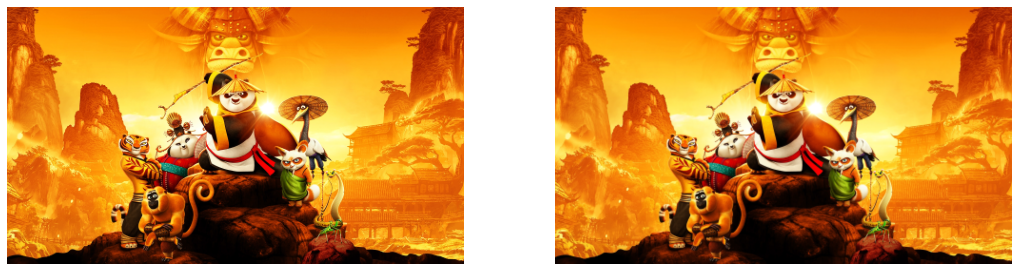

In [6]:
img = cv.imread('../../assignments/a01images/im06small.png')
near_img = cv.resize(img,None, fx = 4, fy = 4, interpolation = cv.INTER_NEAREST)
#bilinear_img = cv.resize(img,None, fx = 4, fy = 4, interpolation = cv.INTER_LINEAR)
fig,(ax1,ax2) = plt.subplots(1,2,  figsize=(18,18))
ax1.imshow(cv.cvtColor(img,  cv . COLOR_BGR2RGB))
ax1.axis("off")
ax2.imshow(cv.cvtColor(near_img,  cv . COLOR_BGR2RGB))
#ax2.imshow(cv.cvtColor(bilinear_img,  cv . COLOR_BGR2RGB))
ax2.axis("off")
print(img.shape,near_img.shape)

In [37]:
from PIL import Image
def stereo_match(left_img, right_img, kernel, max_offset):
    # Load in both images, assumed to be RGBA 8bit per channel images
    left_img = Image.open(left_img).convert('L')
    left = np.asarray(left_img)
    right_img = Image.open(right_img).convert('L')
    right = np.asarray(right_img)    
    w, h = left_img.size  # assume that both images are same size   
    
    # Depth (or disparity) map
    depth = np.zeros((w, h), np.uint8)
    depth.shape = h, w
       
    kernel_half = int(kernel / 2)    
    offset_adjust = 255 / max_offset  # this is used to map depth map output to 0-255 range
      
    for y in range(kernel_half, h - kernel_half):      
        print(".", end="", flush=True)  # let the user know that something is happening (slowly!)
        
        for x in range(kernel_half, w - kernel_half):
            best_offset = 0
            prev_ssd = 65534
            
            for offset in range(max_offset):               
                ssd = 0
                ssd_temp = 0                            
                
                # v and u are the x,y of our local window search, used to ensure a good 
                # match- going by the squared differences of two pixels alone is insufficient, 
                # we want to go by the squared differences of the neighbouring pixels too
                for v in range(-kernel_half, kernel_half):
                    for u in range(-kernel_half, kernel_half):
                        # iteratively sum the sum of squared differences value for this block
                        # left[] and right[] are arrays of uint8, so converting them to int saves
                        # potential overflow, and executes a lot faster 
                        ssd_temp = int(left[y+v, x+u]) - int(right[y+v, (x+u) - offset])  
                        ssd += ssd_temp * ssd_temp              
                
                # if this value is smaller than the previous ssd at this block
                # then it's theoretically a closer match. Store this value against
                # this block..
                if ssd < prev_ssd:
                    prev_ssd = ssd
                    best_offset = offset
                            
            # set depth output for this x,y location to the best match
            depth[y, x] = best_offset * offset_adjust
                                
    # Convert to PIL and save it
    Image.fromarray(depth).save('depth.png')

In [38]:
 stereo_match('../../assignments/a01images/im06.png', bilinear_img, 6, 30)

AttributeError: 'numpy.ndarray' object has no attribute 'read'

(270, 480, 3)
(1350, 2400, 3)


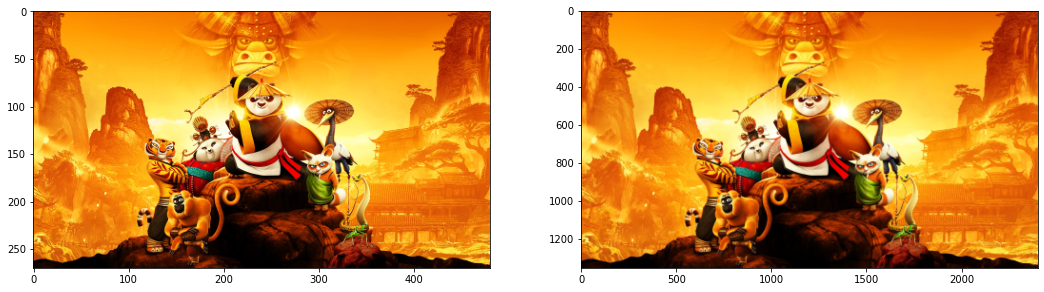

In [4]:
def zoom(image,Scaling_factor,func):
    if len(image.shape)==3:
        new_dimension=[image.shape[0]*Scaling_factor,image.shape[1]*Scaling_factor,image.shape[2]]
    else:
        new_dimension=[image.shape[0]*Scaling_factor,image.shape[1]*Scaling_factor]
    #Creating an image
    new_image=np.zeros(new_dimension,np.uint8)
    if func=='Nearest_Neighbour':
        for i in range(new_dimension[0]):
            for j in range(new_dimension[1]):
                new_image[i][j]=img[int(i/Scaling_factor)][int(j/Scaling_factor)]    
    return new_image

imgo = cv.imread('../../assignments/a01images/im06small.png', cv.IMREAD_COLOR)
img=cv.cvtColor(imgo, cv.COLOR_BGR2RGB)
print(img.shape)
znn = zoom(img, 5, 'Nearest_Neighbour')
print(znn.shape)
fig,ax=plt.subplots(1,2,figsize=(18,18))
ax[0].imshow(img)
ax[1].imshow(znn)

In [31]:
def zoom_nearest_neighboour(img , z_factor):
    h_o = img.shape[0]
    w_o = img.shape[1]
    h_new = h_o*z_factor
    w_new = w_o*z_factor
    new_img = np.zeros(shape=(h_new,w_new,3), dtype='uint8')
    for i in range(h_new):
        for j in range (w_new):
            x=int(i/z_factor)
            y=int(j/z_factor)
            new_img[i,j]=img[x,y]
    return new_img 

In [34]:
def bilinear_zoom(img,Z_factor):
    R_in,C_in,channels =img.shape
    R_out=R_in*Z_factor
    C_out=C_in*Z_factor
    out_img=np.zeros((R_out,C_out,channels),np.uint8)
    sh=R_out/R_in
    sw=C_out/C_in
    for i in range(R_out):
        for j in range(C_out):
            x = i/sh
            y = j/sw
            p=(i+0.0)/sh-x
            q=(j+0.0)/sw-y
            x=int(x)-1
            y=int(y)-1
            out_img[i, j] =(img[x,y]*(1-p)*(1-q)+img[x,y+1]*q*(1-p)+img[x+1,y]*(1-q)*p+img[x+1,y+1]*p*q)
    return out_img 

SSD of two images =  [ 41 108  79]


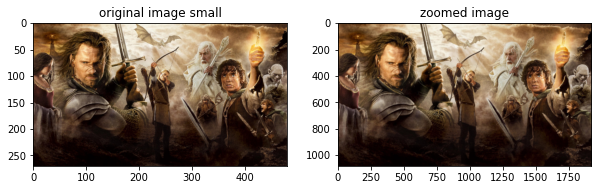

In [48]:
img = cv.imread('../../assignments/a01images/im01small.png')
#zoomed_img = zoom_nearest_neighboour(img, 4)
zoomed_img=bilinear_zoom(img,4)
fig,(ax1,ax2) = plt.subplots(1,2 , figsize=(10,10))
ax1.imshow(cv.cvtColor(img,  cv . COLOR_BGR2RGB))
ax1.set_title("original image small")
ax2.imshow(cv.cvtColor(zoomed_img,  cv . COLOR_BGR2RGB))
ax2.set_title("zoomed image")

#testing 
def SSD(img1,img2):
    h=img1.shape[0]
    w=img1.shape[1]
    SSD=0
    for i in range(h):
        for j in range(w):
            SSD +=(img1[i][j]-img2[i][j])**2
    return SSD
img_given = cv.imread('../../assignments/a01images/im01.png')
print("SSD of two images = ", SSD(img_given,zoomed_img))